In [1]:
# importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import re

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from tensorflow import keras
from tensorflow.keras import layers
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pathlib import Path
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from warnings import simplefilter
simplefilter('ignore')

In [2]:
# tensorflow version
tf.__version__

'2.16.1'

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
# matplotlib defualts
plt.style.use('ggplot')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)

In [5]:
df = pd.read_csv("data/train_1.csv/train_1.csv")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [6]:
df = df.head(50000).copy()

In [7]:
# check for missing values
missing_values = df.isnull().sum()
missing_values

Page             0
2015-07-01    8558
2015-07-02    8634
2015-07-03    8553
2015-07-04    8603
              ... 
2016-12-27    1491
2016-12-28    1464
2016-12-29    1511
2016-12-30    1353
2016-12-31    1505
Length: 551, dtype: int64

In [8]:
df.shape

(50000, 551)

In [9]:
# total missing values
total_missing_values = missing_values.sum()
total_missing_values

2497048

In [10]:
# total datasets count present in the dataset
total_values = np.product(df.shape)
total_values

27550000

In [11]:
# total percent of missing values
percent = (total_missing_values / total_values) * 100
percent

9.063695099818512

In [12]:
# Data Cleaning with filling the missing values
df = df.fillna(0)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [13]:
# calculating the dataframe
train_data = pd.melt(df,id_vars=['Page'],var_name='Date',value_name='Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


In [14]:
train_data.shape

(27500000, 3)

In [15]:
train_data['Date'] = pd.DatetimeIndex(train_data['Date'])

train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


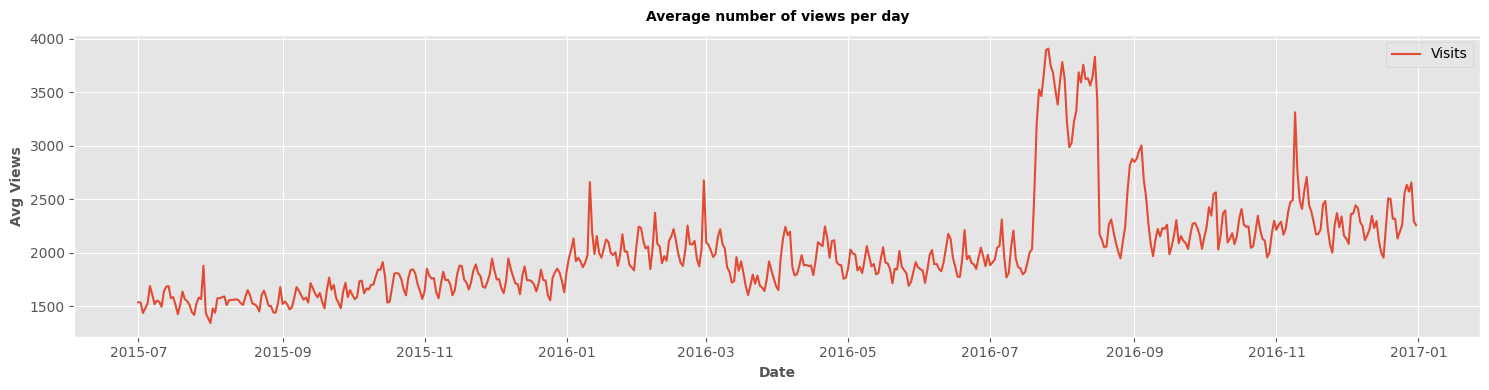

In [16]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].mean()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Average number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

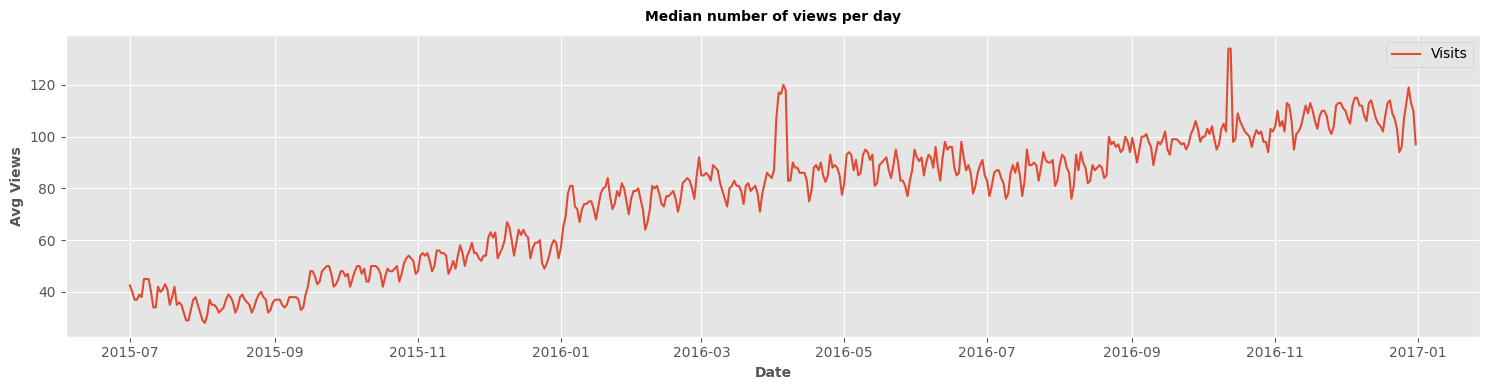

In [17]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].median()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Median number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

In [18]:
train_data = train_data.head(10000000).copy()

In [19]:
train_data['year']=train_data.Date.dt.year
train_data['month']=train_data.Date.dt.month
train_data['day']=train_data.Date.dt.day

In [20]:
# plotting web traffic over the days of month using heatmap
train_data['month_num'] = train_data['month']
train_data['month'].replace('9','9 - September',inplace=True)
train_data['month'].replace('10','10 - October',inplace=True)
train_data['month'].replace('11','11 - November',inplace=True)
train_data['month'].replace('12','12 - December',inplace=True)

In [21]:
train_data.head()

,Page,Date,Visits,year,month,day,month_num
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7


In [22]:
train_data['weekday'] = train_data['Date'].apply(lambda x: x.weekday())

In [23]:
train_data['weekday#'] = train_data['weekday']
train_data['weekday'].replace(0,'01 - Monday',inplace=True)
train_data['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_data['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_data['weekday'].replace(3,'04 - Thursday',inplace=True)
train_data['weekday'].replace(4,'05 - Friday',inplace=True)
train_data['weekday'].replace(5,'06 - Saturday',inplace=True)
train_data['weekday'].replace(6,'07 - Sunday',inplace=True)

In [24]:
train_data.head()

,Page,Date,Visits,year,month,day,month_num,weekday,weekday#
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7,03 - Wednesday,2
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7,03 - Wednesday,2
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7,03 - Wednesday,2
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7,03 - Wednesday,2
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7,03 - Wednesday,2


In [25]:
train_group = train_data.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot(index='weekday', columns='month',values='Visits')
train_group.sort_index(inplace=True)

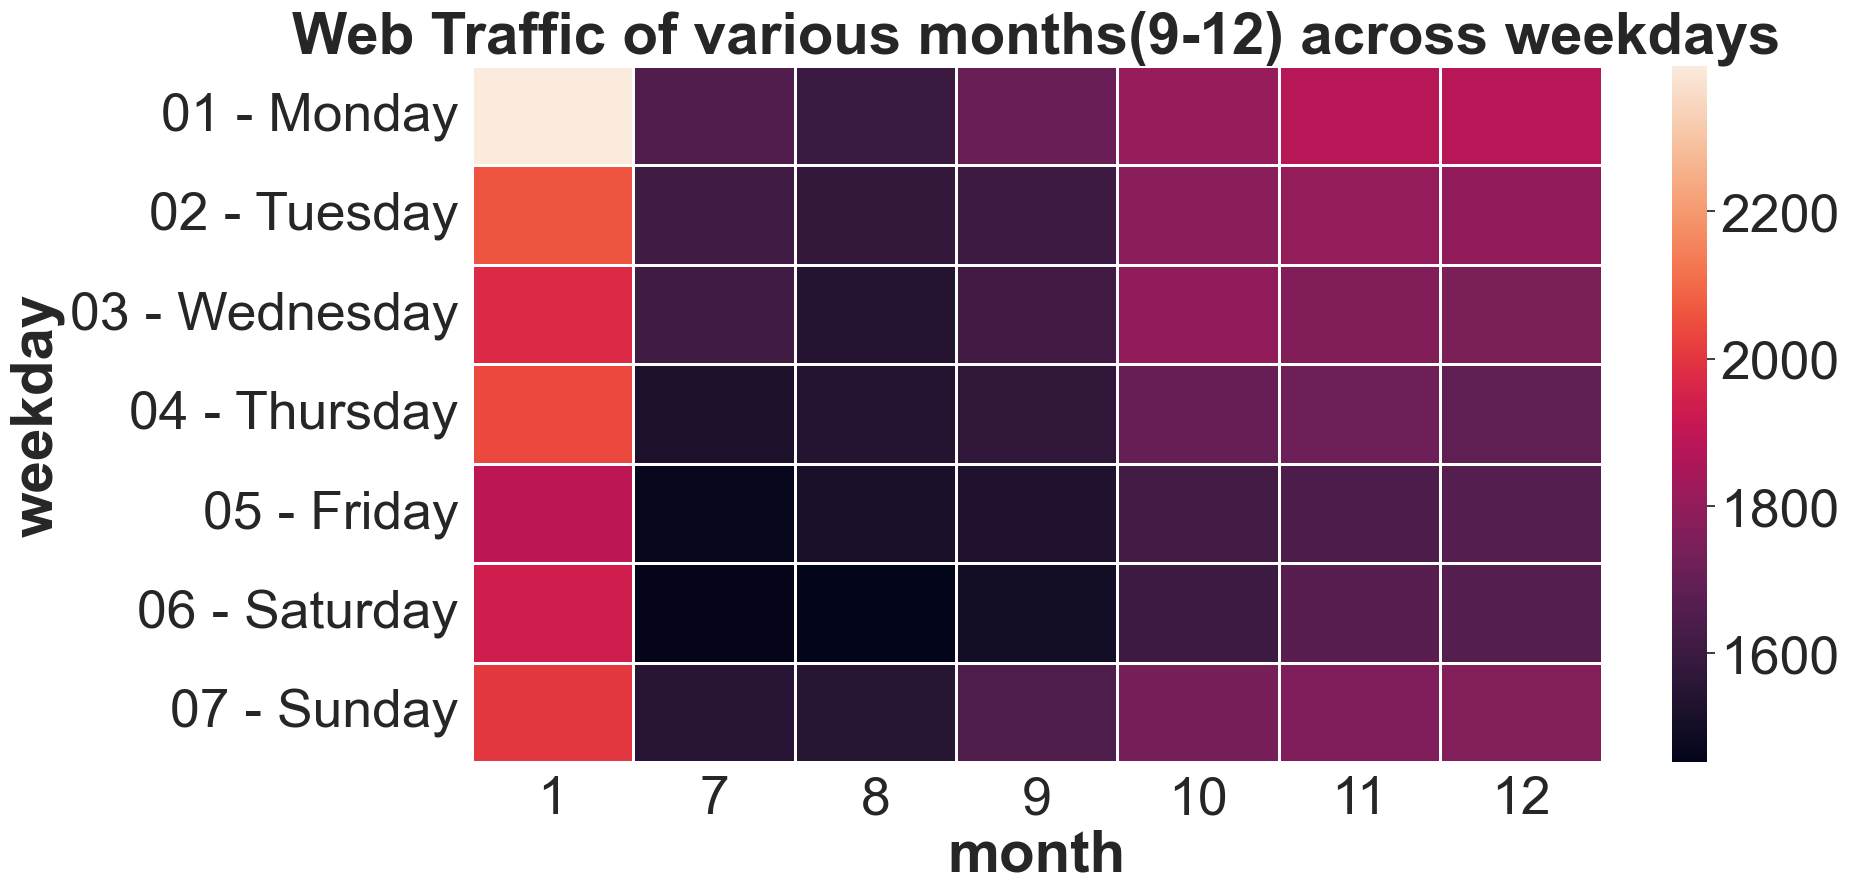

In [26]:
sns.set(font_scale=3.5)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic of various months(9-12) across weekdays')
plt.savefig('webtraffic across weekday.png')

In [27]:
cols_to_drop = ['year','month','day','month_num','weekday','weekday','weekday#']
train_data.drop(cols_to_drop,axis=1,inplace=True)
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
9999995,St._Moritz_de.wikipedia.org_all-access_spider,2016-01-16,10.0
9999996,Star_Wars_de.wikipedia.org_all-access_spider,2016-01-16,80.0
9999997,Status_Quo_de.wikipedia.org_all-access_spider,2016-01-16,7.0
9999998,Stefanie_Stappenbeck_de.wikipedia.org_all-acce...,2016-01-16,33.0


In [28]:
# top 10 pages with maximum number of views
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(10,'Visits')['Page'].tolist()

In [29]:
top5_pages_df = train_data[train_data['Page'].isin(top_pages_list)]
top5_pages_df.head()

,Page,Date,Visits
7344,Wikipédia:Accueil_principal_fr.wikipedia.org_d...,2015-07-01,308925.0
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0
10399,Special:Book_en.wikipedia.org_desktop_all-agents,2015-07-01,174903.0
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,2015-07-01,1628266.0
17670,Заглавная_страница_ru.wikipedia.org_mobile-web...,2015-07-01,672197.0


In [30]:
#detecting language across page
def detect_language(page):
    text = page.split('.wikipedia')
    if re.search('[a-z][a-z]',text[0][-2:]):
        return text[0][-2:]
    else:
        return 'none'

In [31]:
detect_language("Заглавная_страница_ru.wikipedia.org_all-access...")

'ru'

In [32]:
temp1 = train_data
temp1['Wikipedia_page'] = temp1.Page.apply(detect_language)

In [33]:
def lang_code(code):
    if code == 'zh':
        return 'Chinese'
    elif code == 'fr':
        return 'French'
    elif code == 'en':
        return 'English'
    elif code == 'ru':
        return 'Russian'
    elif code == 'de':
        return 'German'
    elif code == 'ja':
        return 'Japanese'
    elif code == 'es':
        return 'Spanish'
    else:
        return 'None'

In [34]:
temp1['Page_language'] = temp1.Wikipedia_page.apply(lang_code)

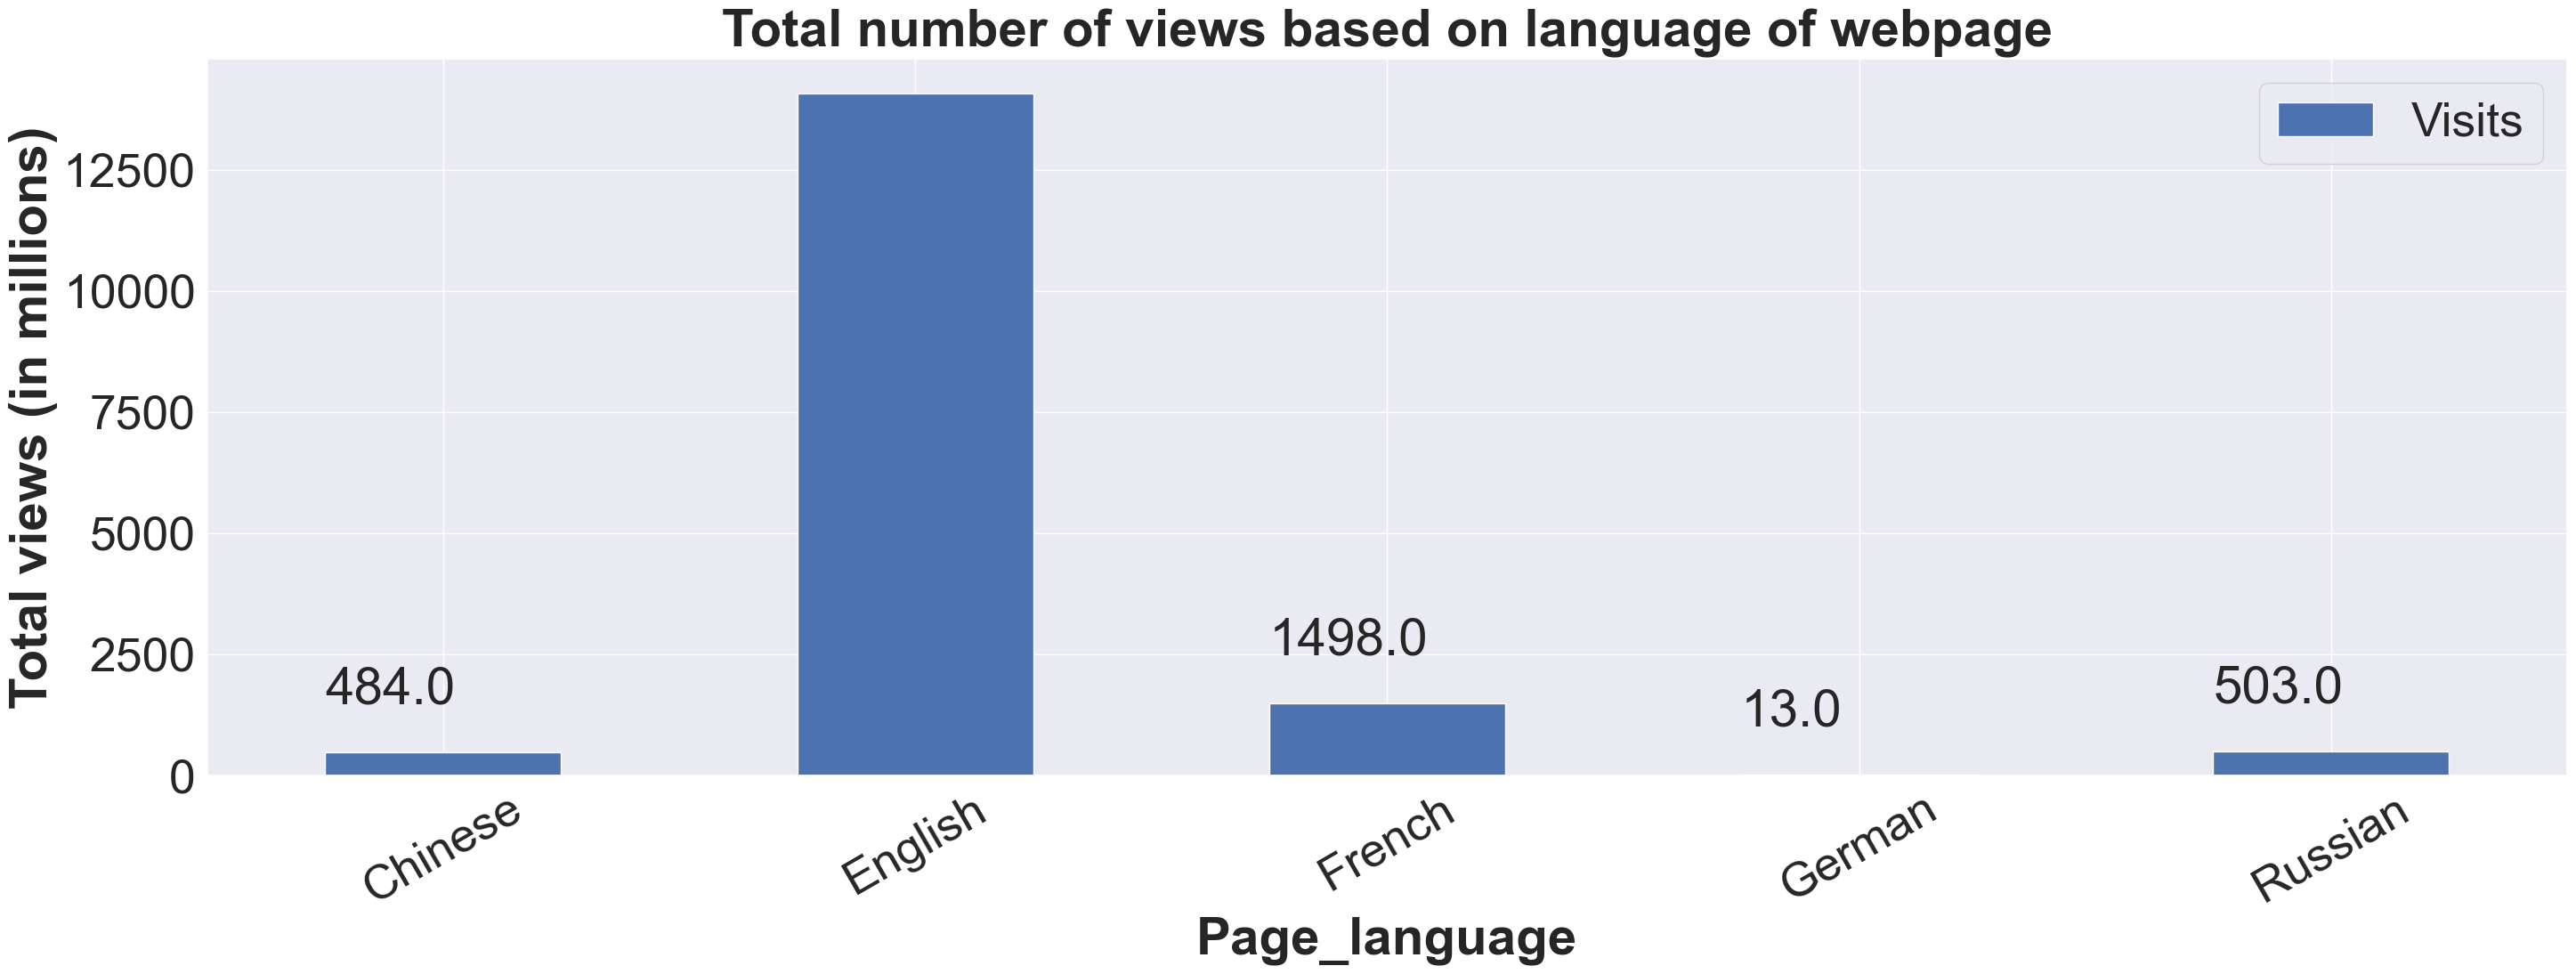

In [35]:
# Total number of views based on language of Wikipedia webpage
fig,ax = plt.subplots(figsize=(30,12))
lang_df = temp1.groupby('Page_language')['Visits'].sum().reset_index()
lang_df = lang_df[lang_df['Page_language']!='None']
lang_df['Visits'] = round(lang_df['Visits']/1000000,0)

bar_graph = lang_df.plot.bar(x='Page_language',y='Visits',rot=30,ax=ax)
bar_graph.set_ylabel('Total views (in millions)')
bar_graph.set_title('Total number of views based on language of webpage')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()+1000))
ax.legend()
plt.savefig("total_view_per_language.png")

In [36]:
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(10,'Visits')['Page'].tolist()
print(top_pages_list)

['Main_Page_en.wikipedia.org_all-access_all-agents', 'Main_Page_en.wikipedia.org_desktop_all-agents', 'Special:Search_en.wikipedia.org_all-access_all-agents', 'Special:Search_en.wikipedia.org_desktop_all-agents', 'Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents', 'Заглавная_страница_ru.wikipedia.org_mobile-web_all-agents', 'Wikipédia:Accueil_principal_fr.wikipedia.org_desktop_all-agents', 'Wikipedia:首页_zh.wikipedia.org_all-access_all-agents', 'Special:Book_en.wikipedia.org_all-access_all-agents', 'Special:Book_en.wikipedia.org_desktop_all-agents']


In [37]:
top10_pages_df = train_data[train_data['Page'].isin(top_pages_list)]

In [38]:
top10_pages_df.head(10)

,Page,Date,Visits,Wikipedia_page,Page_language
7344,Wikipédia:Accueil_principal_fr.wikipedia.org_d...,2015-07-01,308925.0,fr,French
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0,en,English
10399,Special:Book_en.wikipedia.org_desktop_all-agents,2015-07-01,174903.0,en,English
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,2015-07-01,1628266.0,en,English
17670,Заглавная_страница_ru.wikipedia.org_mobile-web...,2015-07-01,672197.0,ru,Russian
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,2015-07-01,1620421.0,fr,French
28727,Wikipedia:首页_zh.wikipedia.org_all-access_all-a...,2015-07-01,220658.0,zh,Chinese
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0,en,English
39172,Special:Book_en.wikipedia.org_all-access_all-a...,2015-07-01,175242.0,en,English
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0,en,English


In [39]:
# Time-series of page with maximum views
top_page_df = train_data[train_data.Page == top_pages_list[0]]
#top_page_df = top_page_df['Visits']
top_page_df['Visits'] = top_page_df['Visits'].div(1000000).round(2)
top_page_df.drop(['Page','Wikipedia_page','Page_language'],axis=1,inplace=True)
top_page_df.head()

,Date,Visits
38573,2015-07-01,20.38
88573,2015-07-02,20.75
138573,2015-07-03,19.57
188573,2015-07-04,20.44
238573,2015-07-05,20.77


In [40]:
top_page_df.reset_index(inplace=True)

In [41]:
top_page_df.head()

,index,Date,Visits
0,38573,2015-07-01,20.38
1,88573,2015-07-02,20.75
2,138573,2015-07-03,19.57
3,188573,2015-07-04,20.44
4,238573,2015-07-05,20.77


In [42]:
top_page_df.drop('index',axis=1,inplace=True)

In [43]:
top_page_df = top_page_df.set_index('Date')
top_page_df.head()

,Visits
Date,
2015-07-01,20.38
2015-07-02,20.75
2015-07-03,19.57
2015-07-04,20.44
2015-07-05,20.77


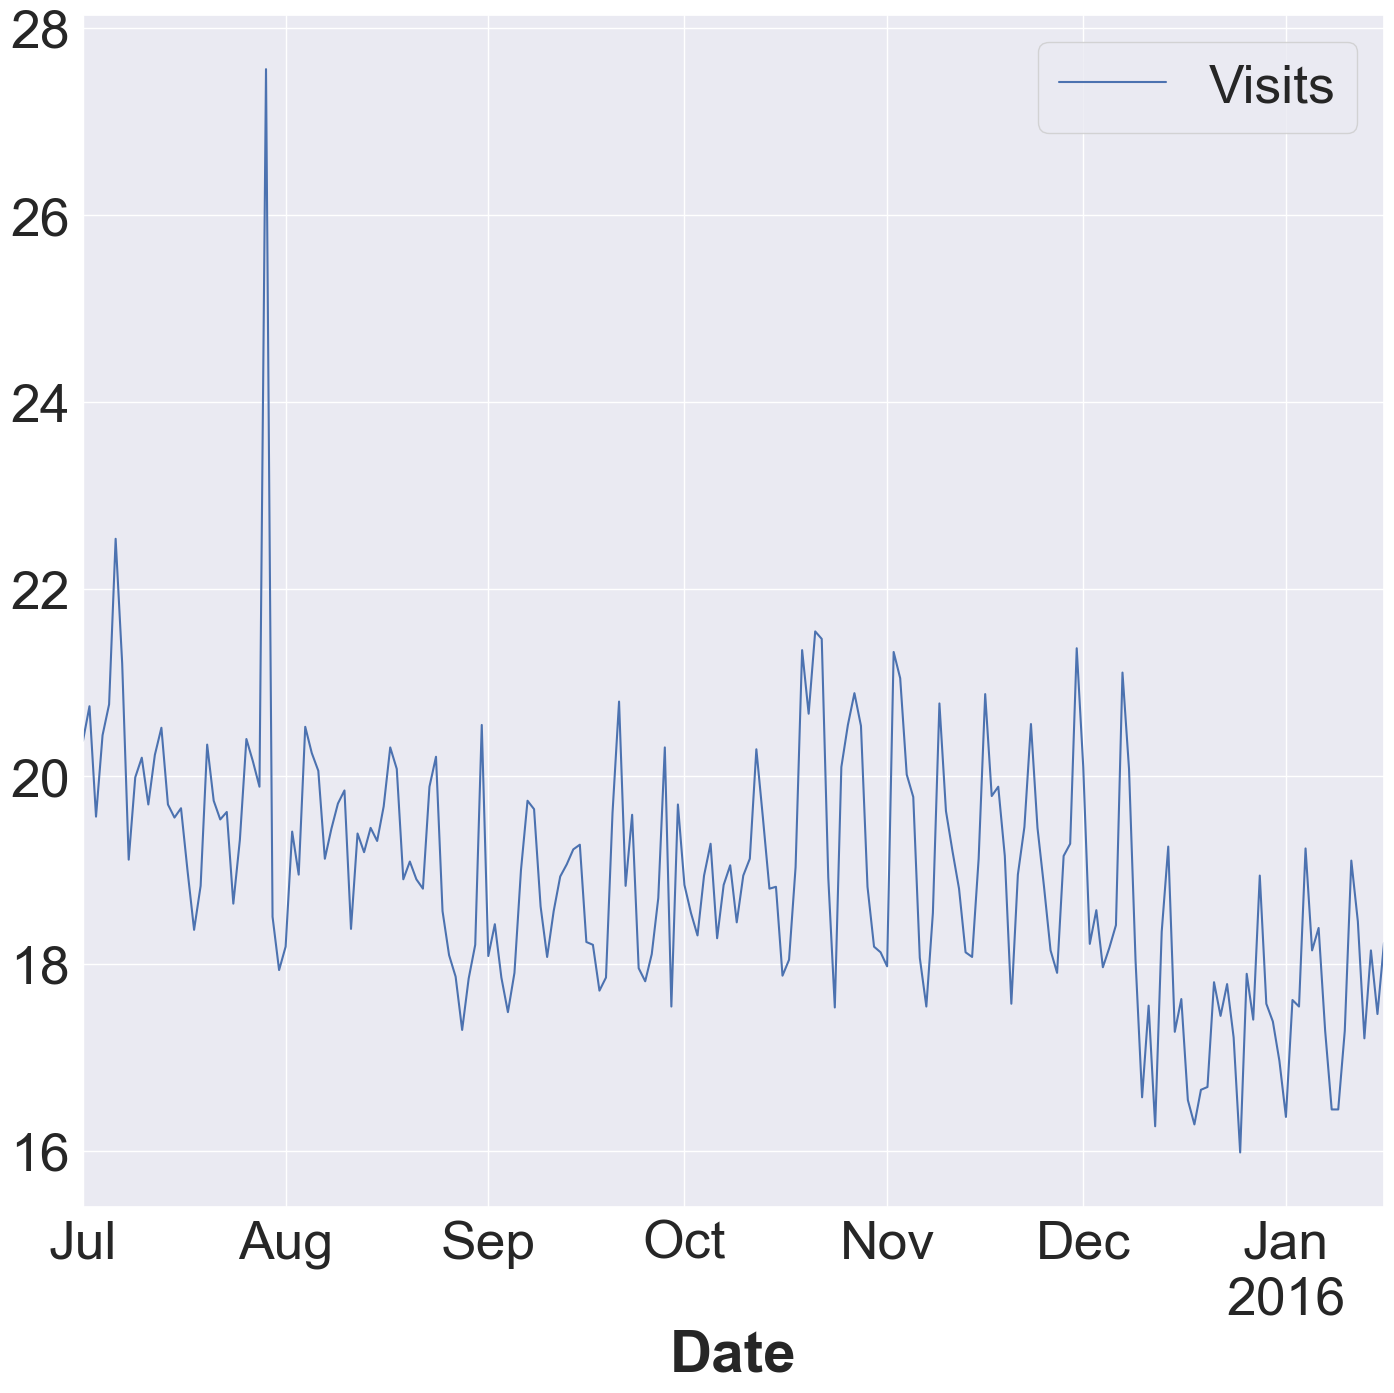

In [44]:
top_page_df.plot(figsize=(15,15))
plt.savefig('Top visits.png')

In [45]:
# Anamoly Detection
isolation_model = IsolationForest(contamination=0.5)
isolation_model.fit(top_page_df)
top_page_df['anomaly'] = isolation_model.predict(top_page_df)
top_page_df.head()

,Visits,anomaly
Date,,
2015-07-01,20.38,-1
2015-07-02,20.75,-1
2015-07-03,19.57,1
2015-07-04,20.44,-1
2015-07-05,20.77,-1


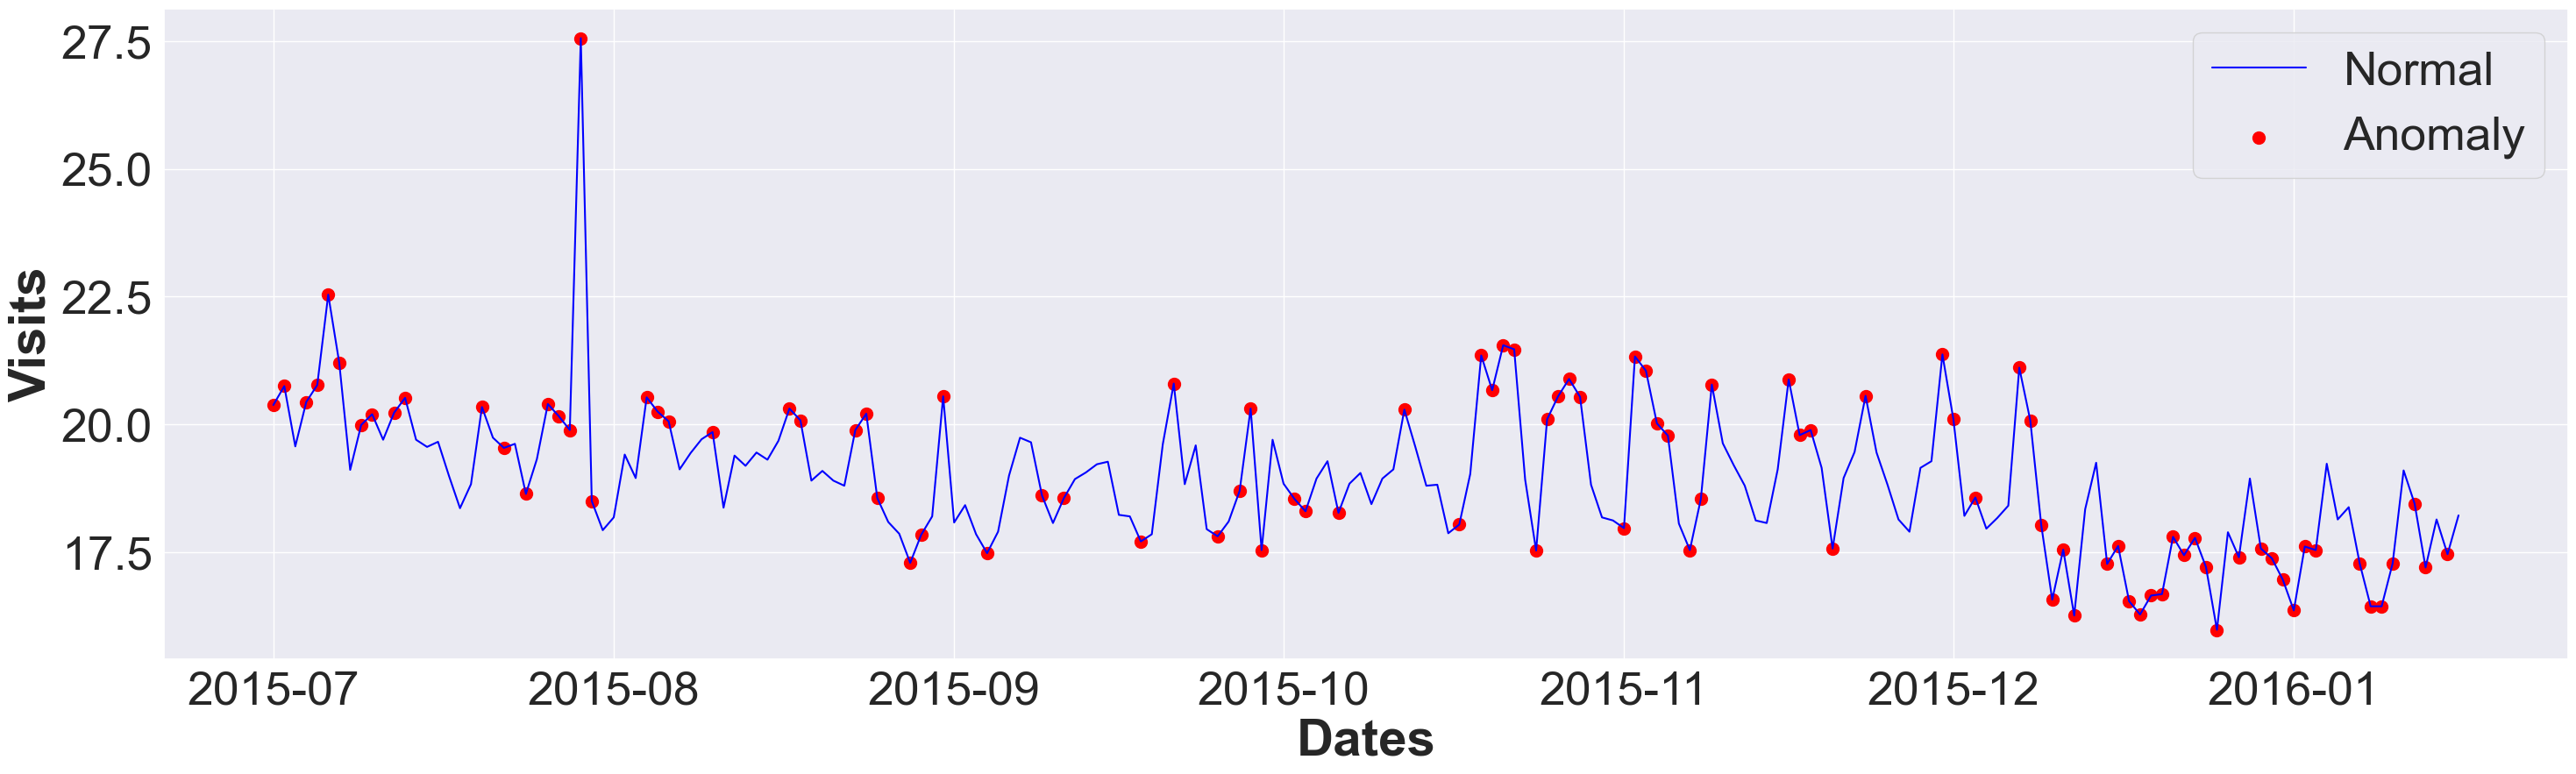

In [46]:
fig, ax = plt.subplots(figsize = (30,10))
anamoly_df = top_page_df.loc[top_page_df['anomaly'] == -1].copy()
ax.plot(top_page_df.index, top_page_df['Visits'], color = 'blue', label = 'Normal')
plt.scatter(anamoly_df.index, anamoly_df['Visits'], color = 'red', s = 100, label = 'Anomaly')
plt.xlabel('Dates')
plt.ylabel('Visits')
plt.legend()
plt.savefig("anomaly.png")

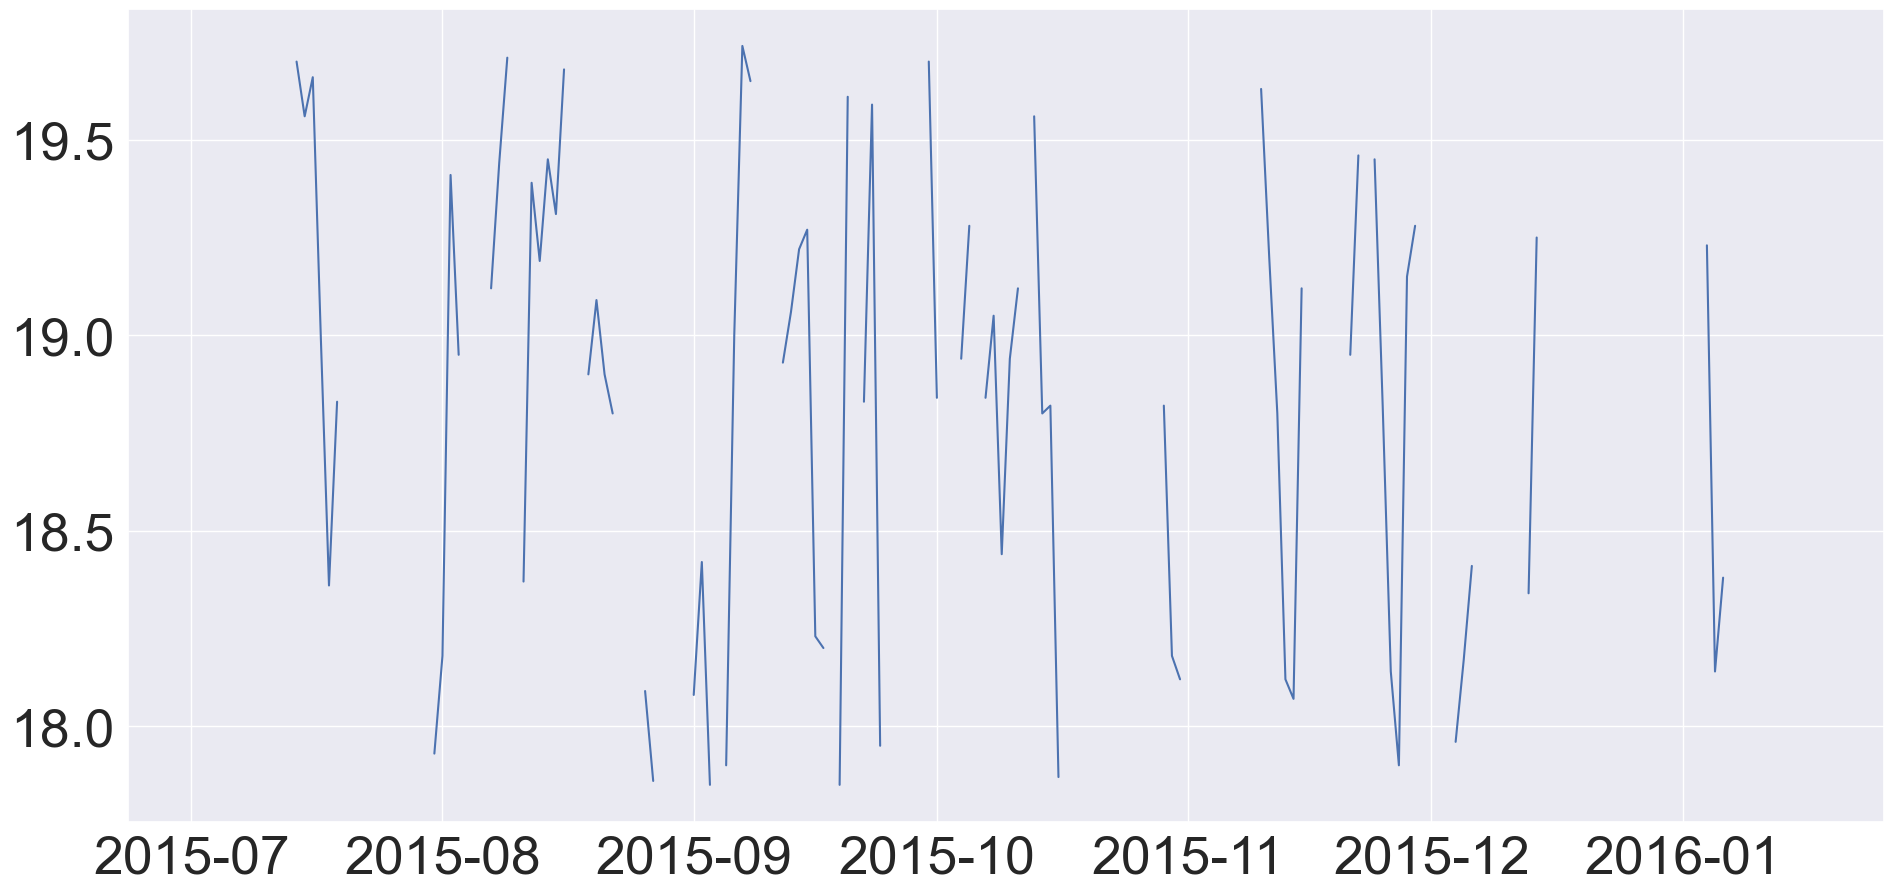

In [47]:
# remove anamolies from the data
top_page_df['new_visits'] = top_page_df.apply(lambda row: row.Visits if row.anomaly == 1 else None, axis ="columns")
plt.figure(figsize = (20, 10))
plt.plot(top_page_df.index, top_page_df.new_visits)
plt.savefig('new visits.png')


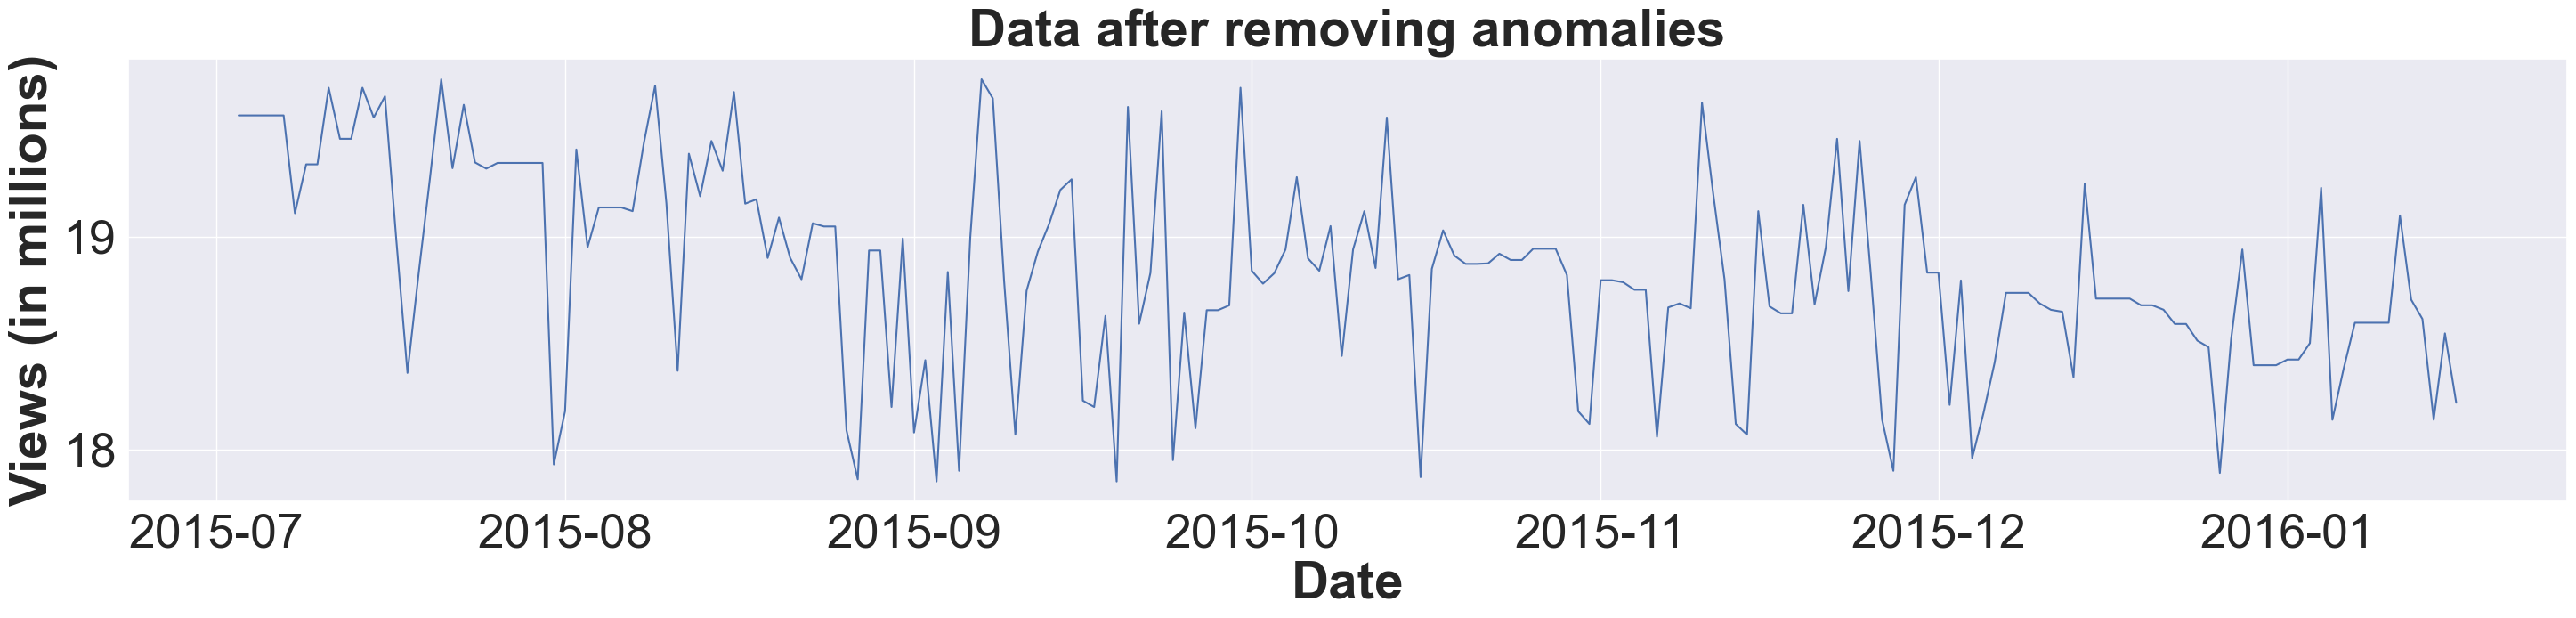

In [48]:
# Filling missing data with rolling mean
top_page_df = top_page_df.assign(rolling_mean=top_page_df.new_visits.fillna(top_page_df.new_visits.rolling(30,min_periods=1).mean()))

plt.figure(figsize=(30,8))
plt.plot(top_page_df.index,top_page_df.rolling_mean)
plt.title('Data after removing anomalies')
plt.xlabel('Date')
plt.ylabel('Views (in millions)')
plt.savefig("cleaned_visit_data.png")

In [49]:
top_page_df.head()

,Visits,anomaly,new_visits,rolling_mean
Date,,,,
2015-07-01,20.38,-1,NaN,NaN
2015-07-02,20.75,-1,NaN,NaN
2015-07-03,19.57,1,19.57,19.57
2015-07-04,20.44,-1,NaN,19.57
2015-07-05,20.77,-1,NaN,19.57


In [50]:
top_page_df = top_page_df.drop(columns=['Visits','anomaly','new_visits']).rename(columns={'rolling_mean':'Views'})
top_page_df.head()

,Views
Date,
2015-07-01,NaN
2015-07-02,NaN
2015-07-03,19.57
2015-07-04,19.57
2015-07-05,19.57


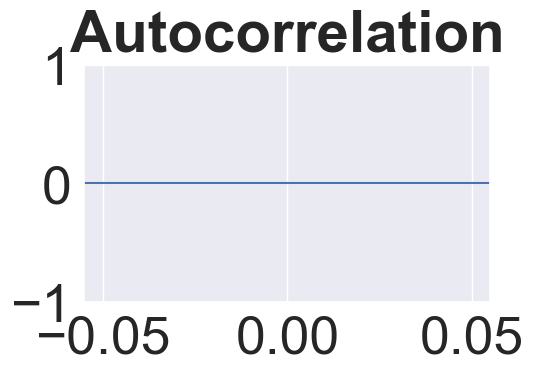

In [51]:
fig = tsaplots.plot_acf(top_page_df['Views'], lags=60)
plt.savefig('autocorellation.png')

In [52]:
top_page_df.head()

,Views
Date,
2015-07-01,NaN
2015-07-02,NaN
2015-07-03,19.57
2015-07-04,19.57
2015-07-05,19.57


In [53]:
top_page_df.isnull().sum()
top_page_df.dropna(axis = 0, how='any')

,Views
Date,
2015-07-03,19.570000
2015-07-04,19.570000
2015-07-05,19.570000
2015-07-06,19.570000
2015-07-07,19.570000
...,...
2016-01-12,18.704286
2016-01-13,18.613333
2016-01-14,18.140000


In [54]:
top_page_df.head()

,Views
Date,
2015-07-01,NaN
2015-07-02,NaN
2015-07-03,19.57
2015-07-04,19.57
2015-07-05,19.57


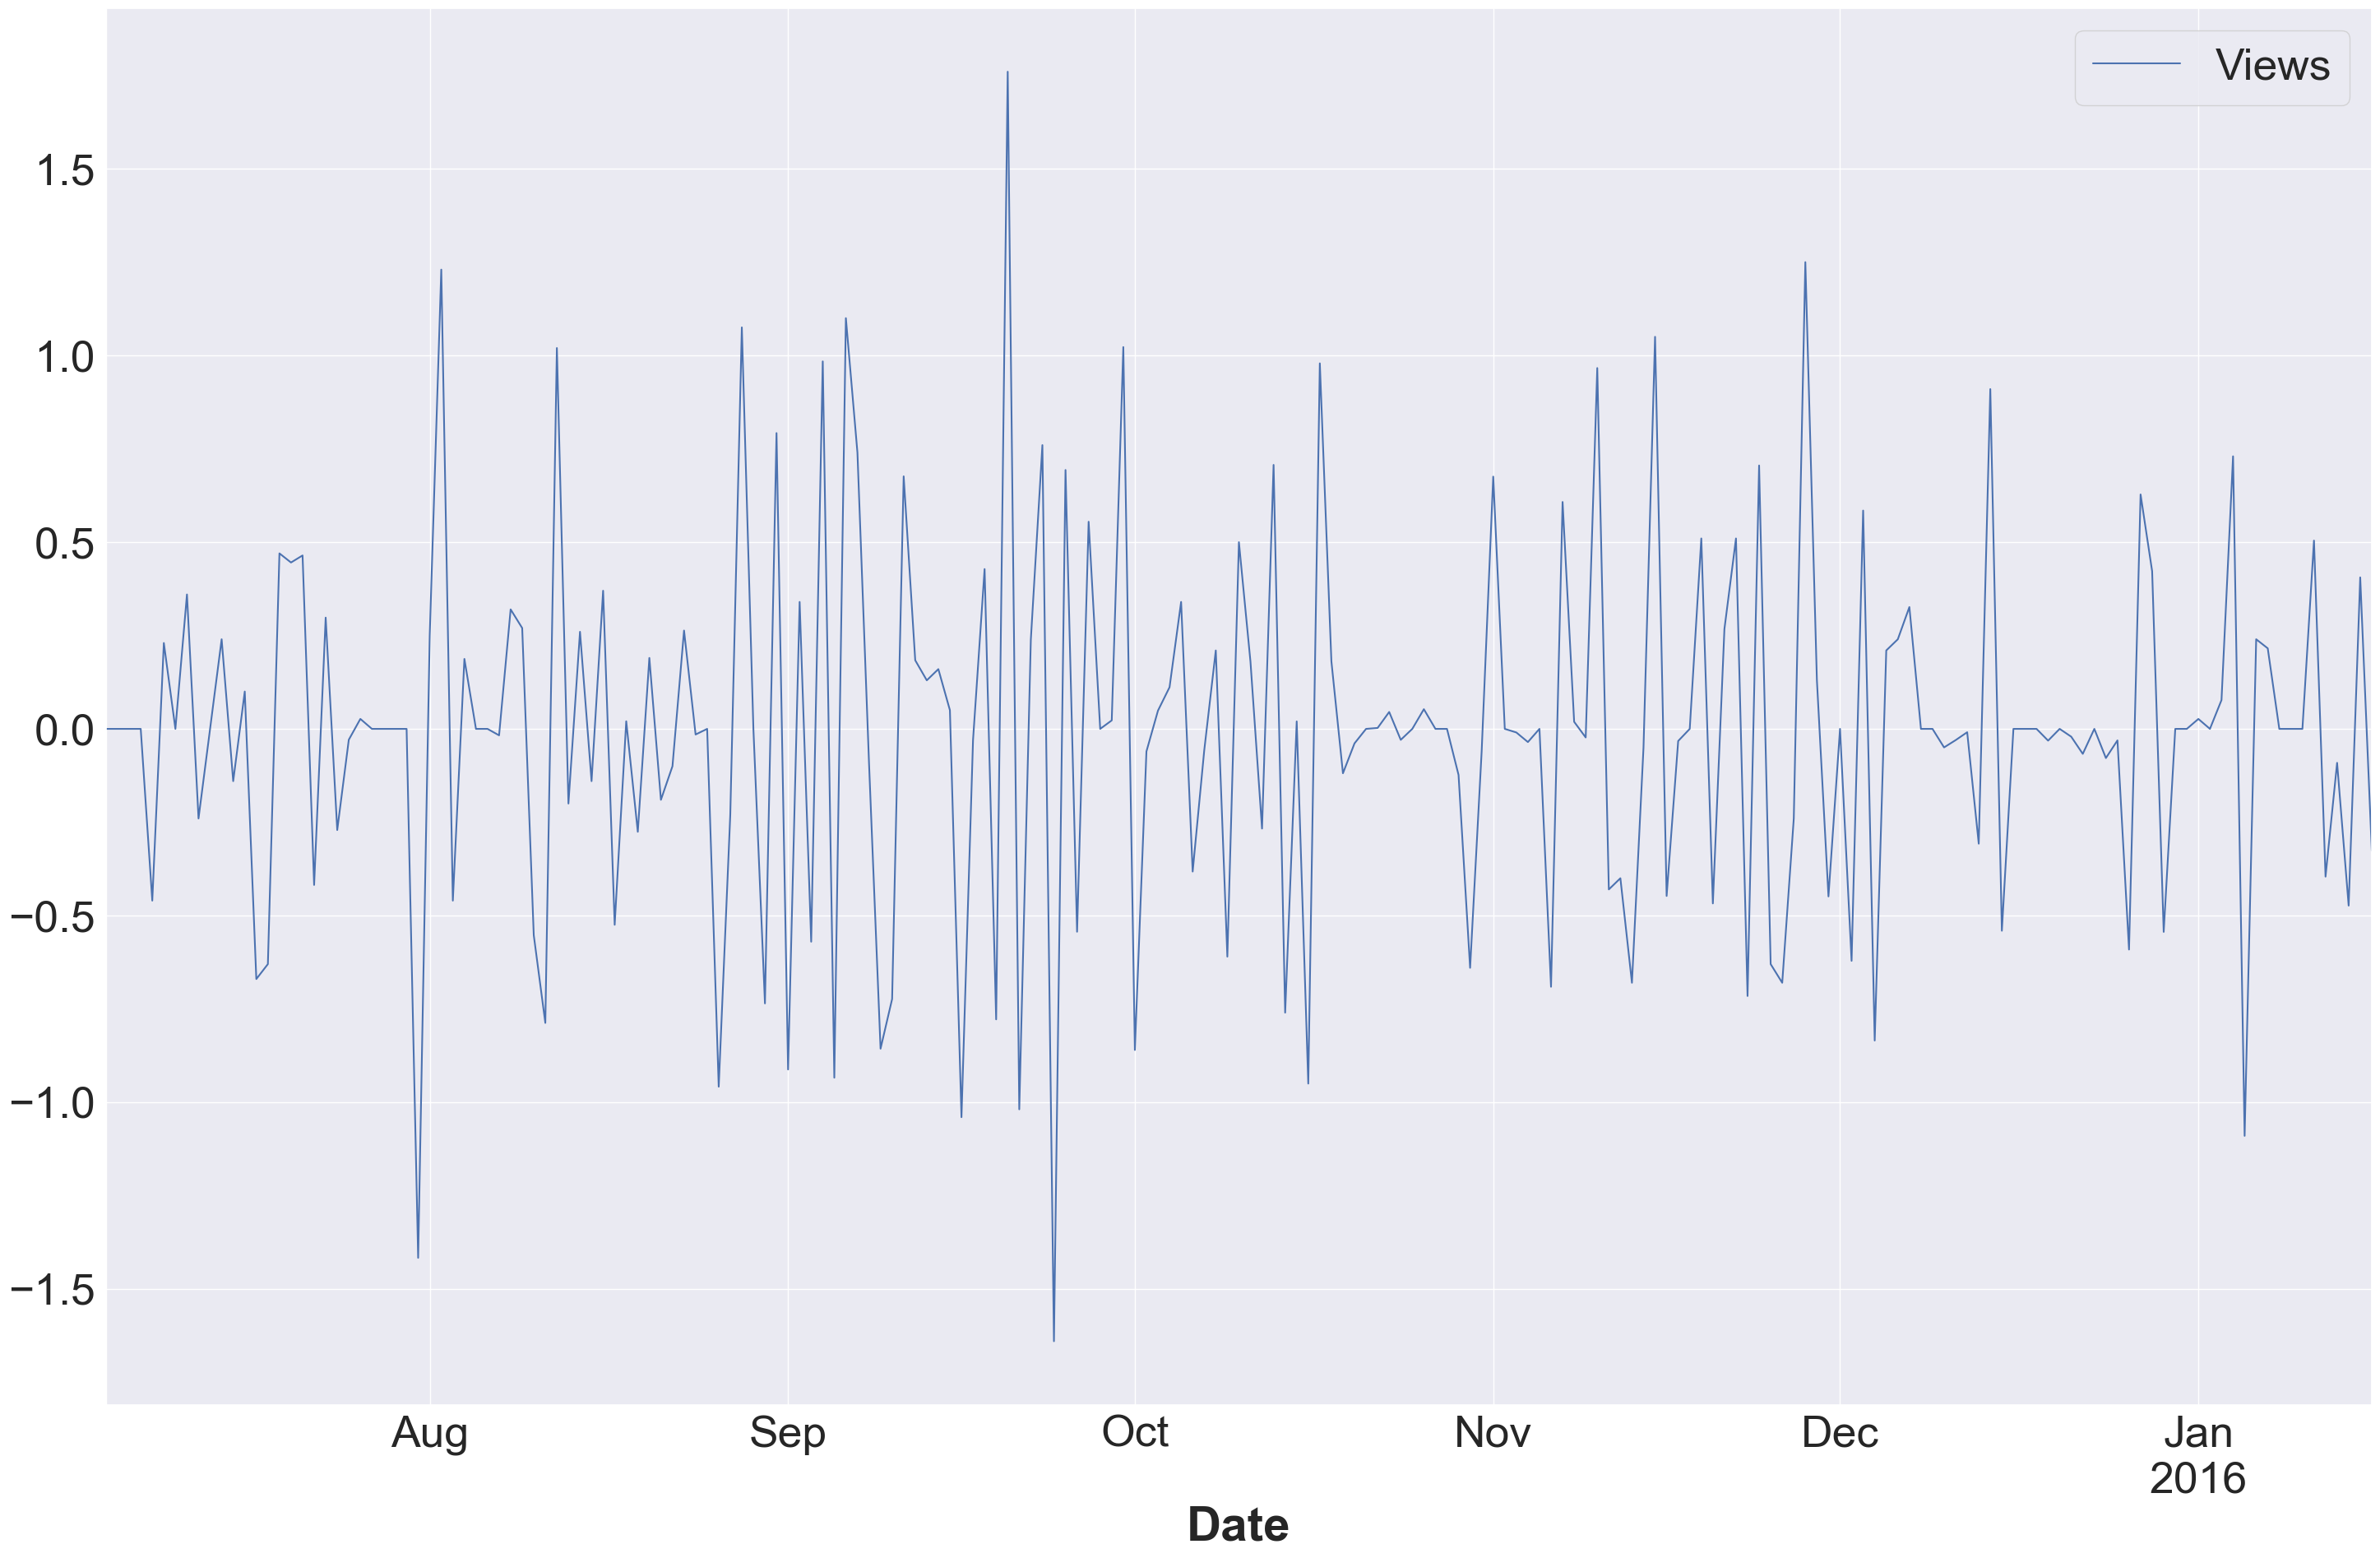

In [55]:
# Differencing the data to make it stationary
top_page_stationary_df = top_page_df.diff().dropna()
ax = top_page_stationary_df.plot(figsize=(30,20))
plt.savefig('another.png')